In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score


##آ

i.

In [7]:
dataset = pd.read_csv("Heart_Disease_Dataset.csv")

X_train = dataset.drop(["target"], axis=1)
y_train = dataset["target"]


print("the size of data = ", len(X_train))
print("the number of feature of dataset = ",X_train.shape[1])

the size of data =  1190
the number of feature of dataset =  11


ii.

In [8]:

if(X_train.isnull().values.any()==True):
  print("there is some NaN value")
if(X_train.isnull().values.any()==False):
  print("there is no NaN value")

there is no NaN value


iii


In [12]:
counter = {}
for y in y_train:
    if y not in counter:
        counter[y] = 0
    counter[y] += 1
print(counter)

print("proportion of classes = {} and {}".format(counter[0]/(counter[0]+
                                      counter[1]),counter[1]/(counter[0]+counter[1])) )

{0: 561, 1: 629}
proportion of classes = 0.4714285714285714 and 0.5285714285714286


we can see the dataset is almost balanced

iv.

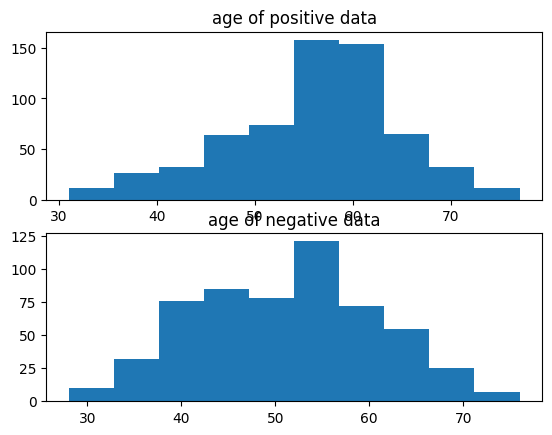

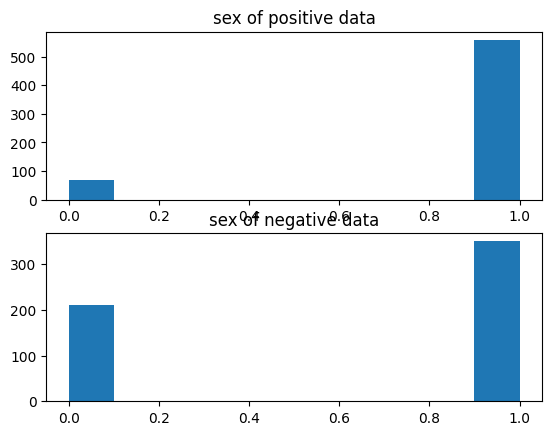

In [13]:
positive_age = dataset[dataset["target"] == 1]["age"]
negative_age = dataset[dataset["target"] == 0]["age"]

positive_sex = dataset[dataset["target"] == 1]["sex"]
negative_sex = dataset[dataset["target"] == 0]["sex"]

plt.subplot(211)
plt.hist(positive_age)
plt.title("age of positive data")

plt.subplot(212)
plt.hist(negative_age)
plt.title("age of negative data")
plt.show()



plt.subplot(211)
plt.hist(positive_sex)
plt.title("sex of positive data")
plt.subplot(212)
plt.hist(negative_sex)
plt.title("sex of negative data")
plt.show()


## ب

In [14]:
z_score = np.abs((X_train-np.mean(X_train, axis=0))/np.std(X_train, axis=0))

z_test_threshold = 3
outliers_indexes = np.where(z_score > 3)[0]
print("we have {} outliers".format(len(outliers_indexes)))

dataset.drop(outliers_indexes, inplace=True)
dataset = dataset.reset_index(drop=True)
print("size after outlier removal = ", len(dataset))


we have 28 outliers
size after outlier removal =  1162


## ج

In [15]:
numerical_features = ['age','chest pain type','resting bp s','cholesterol',
                      'max heart rate','exercise angina','oldpeak','ST slope']
dataset[numerical_features] = (dataset[numerical_features]-dataset[numerical_features].min())/\
                              (dataset[numerical_features].max()-dataset[numerical_features].min())


## د.

In [18]:
np.random.seed(0)
rnd = np.random.permutation(dataset.shape[0])

train_df = dataset.loc[rnd[:int(len(rnd)*0.7)]]
test_df = dataset.loc[rnd[int(len(rnd)*0.7):]]

X_train = train_df.drop(["target"], axis=1)
y_train = train_df["target"]

X_test = test_df.drop(["target"], axis=1)
y_test = test_df["target"]


i.

In [20]:
clf = svm.SVC(C=1, kernel='linear',max_iter = 100000)
clf.fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_hat)
test_acc = accuracy_score(y_test, y_test_hat)
recall = recall_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat)
f1_score = (2*recall*precision)/(recall+precision)
print ("for linear kernel accuracy = {}, recall = {}, precision = {}, f1_score ={}".format(test_acc,recall,precision,f1_score))

for linear kernel accuracy = 0.8166189111747851, recall = 0.7925531914893617, precision = 0.8563218390804598, f1_score =0.8232044198895028


ii.

In [25]:
clf = svm.SVC(C=10, kernel='poly', degree=20,max_iter = 10000)
clf.fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_hat)
test_acc = accuracy_score(y_test, y_test_hat)
recall = recall_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat)
f1_score = (2*recall*precision)/(recall+precision)
print ("for ploynomial kernel accuracy = {}, recall = {}, precision = {}, f1_score ={}".format(test_acc,recall,precision,f1_score))

for ploynomial kernel accuracy = 0.8595988538681948, recall = 0.8031914893617021, precision = 0.9263803680981595, f1_score =0.8603988603988604


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iii.

In [26]:
clf = svm.SVC(C=10, kernel='rbf', gamma=1,max_iter = 10000)
clf.fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_hat)
test_acc = accuracy_score(y_test, y_test_hat)
recall = recall_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat)
f1_score = (2*recall*precision)/(recall+precision)
print ("for rbf kernel accuracy = {}, recall = {}, precision = {}, f1_score ={}".format(test_acc,recall,precision,f1_score))

for rbf kernel accuracy = 0.8739255014326648, recall = 0.8617021276595744, precision = 0.9, f1_score =0.8804347826086957
